# March Madness Machine Learning Project

Autor: Dominik Babić

## Reprodukcija rezultata eksperimenata


Navedeni rad kao pristup rješavanja problema predviđanja vjerojatnosti pobjede određene ekipe uzima individualno uvažavanje varijabli koje statistički najviše koreliraju s postotkom pobjede, izračunavanje kvadratne regresijske funkcije nad njima te zatim očekivanje vjerojatni pobjede nad skupom izračunatih regresijskih vrijednosti.

Značajke koje su u radu određene kao najznačajnije su:
- Razlika u **RPI** rangiranju (*Rating Percentage Index*)
- Razlika u **BPI** (*Basketball Power Index*)
- Razlika u ukupnom broju poena (Razlika u ukupnom broju poena)
- Razlika u ukupnom broju ukradenih lopti (Razlika u ukupnom broju ukradenih lopti)
- Razlika u ukupnom broju blokada (Razlika u ukupnom broju blokada)
- Razlika u postotku šuta iz igre (Razlika u postotku šuta iz igre)

To su značajke koje su dostupne prije samih odigranih utakmica, tj. predstavljaju statistike timova kroz njihovu regularnu sezonu, što ih čini idealnim za korištenje pri predviđanju pobjednika. 

Naime, podaci o samoj utakmici nam neće pomoći jer su oni dostupni tek nakon što je utakmica odigrana, a cilj nam je predvidjeti pobjednika prije samog početka utakmice.

Ovo znanje iskoristit ćemo pri replikaciji eksperimenata iz rada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Prvo ćemo izvući navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede.
U tu svrhu iskoristit ćemo `Tournament Team Data (Including 2023).csv` i `Game Data.csv` datoteke za treniranje te `2023 Game Data.csv` za testiranje modela s obzirom da želimo izvesti predviđanja za timove koji su se kvalificirali u sezoni 2022./2023.

BPI vrijednosti za ekipe kroz godine dohvaćene su s ESPN-ovog API-ja te su spremljene u `bpi_data.csv` datoteku.

In [22]:
tournament_team_data = pd.read_csv('march-madness-data/Tournament Team Data (Including 2023).csv')
game_data = pd.read_csv('march-madness-data/Game Data.csv')
game_data_2023 = pd.read_csv('march-madness-data/2023 Game Data.csv')
bpi_data = pd.read_csv('march-madness-data/bpi_data.csv')

# Nekonzistentnost podataka skupljenih za BPI index s nazivima timova u ostalim skupovima
# bpi_data['TEAM'] = bpi_data['TEAM'].replace(r'\b(\w+\s*St)\b', r'\1.', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace('State', 'St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace(r'\bMiami\b', 'Miami FL', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Fullerton', 'Cal St. Fullerton')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Jacksonville', 'Jacksonville St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('St Bonaventure', 'St. Bonaventure')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Texas A&M-CC', 'Texas A&M CC')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Santa Barbara', 'UC Santa Barbara')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Abilene Chrstn', 'Abilene Christian')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('E Washington', 'Eastern Washington')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Mount St. Marys', "Mount St. Mary's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Virginia ', "Virginia")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("St John's", "St. John's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Kentucky", "Northern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Fair Dickinson", "Fairleigh Dickinson")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Dakota St.", "North Dakota St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC Central", "North Carolina Central")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC St.", "North Carolina St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Prairie View", "Prairie View A&M")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Charleston", "College of Charleston")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SF Austin", "Stephen F. Austin")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Long Island", "LIU Brooklyn")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("MTSU", "Middle Tennessee")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("ETSU", "East Tennessee St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FGCU", "Florida Gulf Coast")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Pitt", "Pittsburgh")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Little Rock", "Arkansas Little Rock")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Hawai'i", "Hawaii")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Bakersfield", "Cal St. Bakersfield")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UAlbany", "Albany")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Coastal Car", "Coastal Carolina")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UMass", "Massachusetts")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("G Washington", "George Washington")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("W Michigan", "Western Michigan")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Louisiana", "Louisiana Lafayette")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("E Kentucky", "Eastern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N'Western St.", "Northwestern St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC A&T", "North Carolina A&T")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Western KY", "Western Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Detroit Mercy", "Detroit")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Miss Valley St.", "Mississippi Valley St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Colorado", "Northern Colorado")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Boston U", "Boston University")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Sam Houston", "Sam Houston St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("AR-Pine Bluff", "Arkansas Pine Bluff")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("CSU Northridge", "Cal St. Northridge")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FAU", "Florida Atlantic")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SE Missouri", "Southeast Missouri St.")
# bpi_data.to_csv('march-madness-data/bpi_data.csv', index=False)

tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Virginia ", "Virginia")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Mississippi", "Mississippi St.")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")
game_data_2023['TEAM'] = game_data_2023['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")

tournament_team_data = tournament_team_data.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS']]
tournament_team_data = tournament_team_data.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')
game_data_2023 = game_data_2023.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')

tournament_team_data.info()
tournament_team_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           1011 non-null   int64  
 1   SEED                           1011 non-null   int64  
 2   TEAM                           1011 non-null   object 
 3   WIN %                          1011 non-null   float64
 4   BLOCK %                        1011 non-null   float64
 5   EFG %                          1011 non-null   float64
 6   BARTHAG                        1011 non-null   float64
 7   DEFENSIVE REBOUND %            1011 non-null   float64
 8   POINTS PER POSSESSION OFFENSE  1011 non-null   float64
 9   ELITE SOS                      1011 non-null   float64
 10  BPI                            1011 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 87.0+ KB


,YEAR,SEED,WIN %,BLOCK %,EFG %,BARTHAG,DEFENSIVE REBOUND %,POINTS PER POSSESSION OFFENSE,ELITE SOS,BPI
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,2015.255193,8.768546,72.484097,10.526805,52.022849,0.797466,70.654995,1.087527,23.771562,9.312661
std,4.591874,4.673269,9.962943,2.889600,2.711947,0.168642,3.227122,0.049497,8.977729,6.165912
min,2008.000000,1.000000,36.670000,3.700000,41.900000,0.129000,60.700000,0.907000,5.060000,-16.000000
25%,2011.000000,5.000000,65.630000,8.500000,50.100000,0.743500,68.400000,1.055000,14.925000,5.800000
50%,2015.000000,9.000000,72.730000,10.200000,52.000000,0.860000,70.500000,1.088000,25.700000,10.100000
75%,2019.000000,13.000000,78.790000,12.450000,53.900000,0.914000,72.800000,1.122000,31.345000,13.500000
max,2023.000000,16.000000,100.000000,21.400000,61.000000,0.985000,81.400000,1.241000,41.630000,23.900000


In [23]:
game_data_2023 = game_data_2023.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS','BPI']]

game_data_2023.info()
game_data_2023.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           148 non-null    int64  
 1   SEED                           148 non-null    int64  
 2   TEAM                           148 non-null    object 
 3   WIN %                          148 non-null    float64
 4   BLOCK %                        148 non-null    float64
 5   EFG %                          148 non-null    float64
 6   BARTHAG                        148 non-null    float64
 7   DEFENSIVE REBOUND %            148 non-null    float64
 8   POINTS PER POSSESSION OFFENSE  148 non-null    float64
 9   ELITE SOS                      148 non-null    float64
 10  BPI                            148 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 12.8+ KB


,YEAR,SEED,WIN %,BLOCK %,EFG %,BARTHAG,DEFENSIVE REBOUND %,POINTS PER POSSESSION OFFENSE,ELITE SOS,BPI
count,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2023.0,6.567568,73.526495,10.362162,52.475000,0.847297,72.583784,1.096020,26.486189,11.058784
std,0.0,4.472383,9.725172,2.476815,2.368267,0.129397,2.814807,0.043223,7.577910,5.750598
min,2023.0,1.000000,37.500000,4.500000,46.200000,0.215000,62.700000,0.939000,5.149000,-9.200000
25%,2023.0,3.000000,65.625000,8.300000,51.200000,0.824000,71.000000,1.062000,23.623000,9.350000
50%,2023.0,6.000000,73.861480,10.000000,52.200000,0.884000,72.650000,1.096000,28.128000,11.700000
75%,2023.0,10.000000,81.250000,12.025000,53.500000,0.927000,74.500000,1.129000,30.680500,14.275000
max,2023.0,16.000000,91.176471,16.400000,58.600000,0.959000,78.200000,1.205000,38.469000,20.500000


Sada ćemo pokušati izvesti navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede. Možemo primjetiti da neke od navedenih značajki nisu dostupne u skupu podataka, a nije ih moguće izračunati iz dostupnih podataka, one će biti zamijenjene sličnim značajkama koje su dostupne u skupu podataka (nisu dostupni BPI, RPI, ukupni blokovi, ukupni poeni i broj ukradenih lopti).

Prvi korak je određivanje pobjednika i gubitnika utakmica čije podatke imamo u skupu podataka `Game Data.csv`. U tom skupu podataka svaka dva retka prikazuju podatke o jednoj utakmici, tako da ćemo reducirati broj podataka na pola.

In [24]:
new_columns = ['YEAR', 'WINNING TEAM', 'LOSING TEAM', 'W TEAM LOC']

new_game_data_rows = []

for i in range(0, len(game_data), 2):
    game1_row = game_data.iloc[i]
    game2_row = game_data.iloc[i + 1]

    winning_team_stats = game1_row if game1_row['TEAM 1 OUTCOME'] == 'W' else game2_row
    losing_team_stats = game2_row if game1_row['TEAM 1 OUTCOME'] == 'W' else game1_row

    new_row = [game1_row['YEAR'], winning_team_stats['TEAM 1'], losing_team_stats['TEAM 1'], winning_team_stats['TEAM 1 LOCATION']]
    new_game_data_rows.append(new_row)

game_data = pd.DataFrame(new_game_data_rows, columns=new_columns)

In [25]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80113 entries, 0 to 80112
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          80113 non-null  int64 
 1   WINNING TEAM  80113 non-null  object
 2   LOSING TEAM   80113 non-null  object
 3   W TEAM LOC    80113 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


Sada ćemo u ovu tablicu nadodati podatke pobjednika i gubitnika za istu godinu iz tablice `Tournament Team Data (Including 2023).csv` te izračunati razliku u svim značajkama koje su nam dostupne. Osim toga, izračunat ćemo podatke koji nam nedostaju, a to je RPI index. RPI index je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Ovaj indeks je dostupan za svaku ekipu u tablici `Tournament Team Data (Including 2023).csv` te ćemo ga iskoristiti za izračun RPI indeksa za svaku utakmicu u tablici `Game Data.csv`.

In [26]:
merged_data_winning = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'WINNING TEAM'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_winning = merged_data_winning.drop(["TEAM"], axis=1)
merged_data_winning = merged_data_winning.rename(columns=lambda x: 'WINNER TEAM ' + x if x not in ['YEAR', 'LOSING TEAM', 'WINNING TEAM', 'W TEAM LOC'] else x)

merged_data_losing = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'LOSING TEAM'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_losing = merged_data_losing.drop(["TEAM"], axis=1)
merged_data_losing = merged_data_losing.rename(columns=lambda x: 'LOSER TEAM ' + x if x not in ['YEAR', 'WINNING TEAM', 'LOSING TEAM', 'W TEAM LOC'] else x)

merged_data = pd.merge(merged_data_winning, merged_data_losing, on=['YEAR', 'WINNING TEAM', 'LOSING TEAM', 'W TEAM LOC'], how='outer')

# Filter out non-numeric columns
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols.values:
    if merged_data[col].isnull().values.any():
        merged_data[col].fillna(merged_data[col].interpolate(), inplace=True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86552 entries, 0 to 86551
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       86552 non-null  int64  
 1   WINNING TEAM                               81925 non-null  object 
 2   LOSING TEAM                                81925 non-null  object 
 3   W TEAM LOC                                 81925 non-null  object 
 4   WINNER TEAM SEED                           86510 non-null  float64
 5   WINNER TEAM WIN %                          86510 non-null  float64
 6   WINNER TEAM BLOCK %                        86510 non-null  float64
 7   WINNER TEAM EFG %                          86510 non-null  float64
 8   WINNER TEAM BARTHAG                        86510 non-null  float64
 9   WINNER TEAM DEFENSIVE REBOUND %            86510 non-null  float64
 10  WINNER TEAM POINTS PER

Sada ćemo isti postupak provesti nad tablicom `2023 Game Data.csv` kako bismo dobili podatke za testiranje prediktivnih sposobnosti modela. Te podatke ćemo zatim spojiti s ostalim podacima, kako bi za svaku utakmicu mogli izračunati RPI indeks.

In [27]:
cols = merged_data.columns
    
new_game_data_rows = []

for i in range(0, len(game_data_2023), 2):
    team1_row = game_data_2023.iloc[i]
    team2_row = game_data_2023.iloc[i + 1]

    if team1_row['WIN %'] >= team2_row['WIN %']:
        new_row = [team1_row['YEAR'], team1_row['TEAM'], team2_row['TEAM'], 'N', team1_row['SEED'], team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team1_row['BPI'], team2_row['SEED'], team2_row['WIN %'], team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI']]
    else:
        new_row = [team2_row['YEAR'], team2_row['TEAM'], team1_row['TEAM'], 'N', team2_row['SEED'], team2_row['WIN %'], team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI'], team1_row['SEED'], team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], team1_row['ELITE SOS'], team1_row['BPI']]
    new_game_data_rows.append(new_row)

game_data_2023_new = pd.DataFrame(new_game_data_rows, columns=cols)
merged_data = pd.concat([merged_data, game_data_2023_new])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86626 entries, 0 to 73
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       86626 non-null  int64  
 1   WINNING TEAM                               81999 non-null  object 
 2   LOSING TEAM                                81999 non-null  object 
 3   W TEAM LOC                                 81999 non-null  object 
 4   WINNER TEAM SEED                           86584 non-null  float64
 5   WINNER TEAM WIN %                          86584 non-null  float64
 6   WINNER TEAM BLOCK %                        86584 non-null  float64
 7   WINNER TEAM EFG %                          86584 non-null  float64
 8   WINNER TEAM BARTHAG                        86584 non-null  float64
 9   WINNER TEAM DEFENSIVE REBOUND %            86584 non-null  float64
 10  WINNER TEAM POINTS PER POSSESS

RPI indeks je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Opća formula za izračun RPI indeksa je:
$$
RPI = 0.25 * WP + 0.5 * OWP + 0.25 * OOWP
$$
gdje:
- WP predstavlja postotak pobjeda ekipe
- OWP predstavlja prosječni postotak pobjeda protivnika ekipe
- OOWP predstavlja prosječni postotak pobjeda protivnika protivnika ekipe

Protivnički postotak pobjeda i postotak pobjeda protivnika tih protivnika čine snagu rasporeda (SOS). Stoga, SOS čini 75% RPI izračuna.
Znajući to, RPI indeks možemo izračunati na sljedeći način:
$$
RPI = 0.25 * WP + 0.75 * SOS
$$

U sljedećim odlomcima koda, izveo sam oba pristupa računanja RPI indeksa, a u svrhu ovog rada, koristit ćemo drugi pristup.

In [ ]:
# Calculate OWP
owp_data = merged_data.groupby(['YEAR', 'WINNING TEAM']).agg({'LOSER TEAM WIN %': 'mean'}).reset_index()
owp_data = owp_data.rename(columns={'LOSER TEAM WIN %': 'OWP', 'WINNING TEAM': 'TEAM'})

# Calculate OOWP
oowp_data = owp_data.groupby(['YEAR', 'TEAM']).agg({'OWP': 'mean'}).reset_index()
oowp_data = oowp_data.rename(columns={'OWP': 'OOWP'})

# Merge OWP and OOWP data with merge_data
merged_data = pd.merge(owp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'WINNING TEAM'], how='left', suffixes=('', '_winning'))
merged_data = pd.merge(oowp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'WINNING TEAM'], how='left', suffixes=('', '_winning'))

# Calculate RPI index for WINNING TEAM
merged_data['RPI WINNING TEAM'] = (0.25 * merged_data['WINNER TEAM WIN %']) + (0.50 * merged_data['OWP']) + (0.25 * merged_data['OOWP'])
merged_data = merged_data.drop(['OWP', 'OOWP', 'TEAM_winning'], axis=1)

merged_data.info()

# Repeat the process for LOSING TEAM
owp_data_losing = merged_data.groupby(['YEAR', 'LOSING TEAM']).agg({'WINNER TEAM WIN %': 'mean'}).reset_index()
owp_data_losing = owp_data_losing.rename(columns={'WINNER TEAM WIN %': 'OWP', 'LOSING TEAM': 'TEAM'})

oowp_data_losing = owp_data_losing.groupby(['YEAR', 'TEAM']).agg({'OWP': 'mean'}).reset_index()
oowp_data_losing = oowp_data_losing.rename(columns={'OWP': 'OOWP'})

# Merge OWP and OOWP data with merge_data for LOSING TEAM
# merged_data = pd.merge(owp_data_losing, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'LOSING TEAM'], how='left', suffixes=('', '_merged'))
# merged_data = pd.merge(oowp_data_losing, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'LOSING TEAM'], how='left', suffixes=('', '_merged_1'))

# Calculate RPI index for LOSING TEAM
# merged_data['RPI LOSING TEAM'] = (0.25 * merged_data['LOSER TEAM WIN %']) + (0.50 * merged_data['OWP']) + (0.25 * merged_data['OOWP'])
# merged_data = merged_data.drop(['OWP', 'OOWP', 'TEAM_merged_1'], axis=1)

# merged_data.info()
# merged_data.describe()


In [29]:
merged_data['RPI WINNING TEAM'] = 0.25 * merged_data['WINNER TEAM WIN %'] + 0.75 * merged_data['WINNER TEAM ELITE SOS']
merged_data['RPI LOSING TEAM'] = 0.25 * merged_data['LOSER TEAM WIN %'] + 0.75 * merged_data['LOSER TEAM ELITE SOS']

Raspodijelit ćemo razrađene podatke sada na one za treniranje modela (do 2023. godine) i na one za testiranje modela (podaci iz 2023. godine).

In [30]:
merged_data['EFG % DIFF'] = merged_data['WINNER TEAM EFG %'] - merged_data['LOSER TEAM EFG %']
merged_data['BLOCK % DIFF'] = merged_data['WINNER TEAM BLOCK %'] - merged_data['LOSER TEAM BLOCK %']
merged_data['BPI DIFF'] = merged_data['WINNER TEAM BPI'] - merged_data['LOSER TEAM BPI']
merged_data['RPI DIFF'] = merged_data['RPI WINNING TEAM'] - merged_data['RPI LOSING TEAM']
merged_data['PPPO DIFF'] = merged_data['WINNER TEAM POINTS PER POSSESSION OFFENSE'] - merged_data['LOSER TEAM POINTS PER POSSESSION OFFENSE']
merged_data['DEFENSIVE REBOUND % DIFF'] = merged_data['WINNER TEAM DEFENSIVE REBOUND %'] - merged_data['LOSER TEAM DEFENSIVE REBOUND %']
merged_data['WIN % DIFF'] = merged_data['WINNER TEAM WIN %'] - merged_data['LOSER TEAM WIN %']

train_data = merged_data[merged_data['YEAR'] != 2023]
test_data = merged_data[merged_data['YEAR'] == 2023]

Prikazat ćemo podatke prije nego li ih provedemo kroz model.

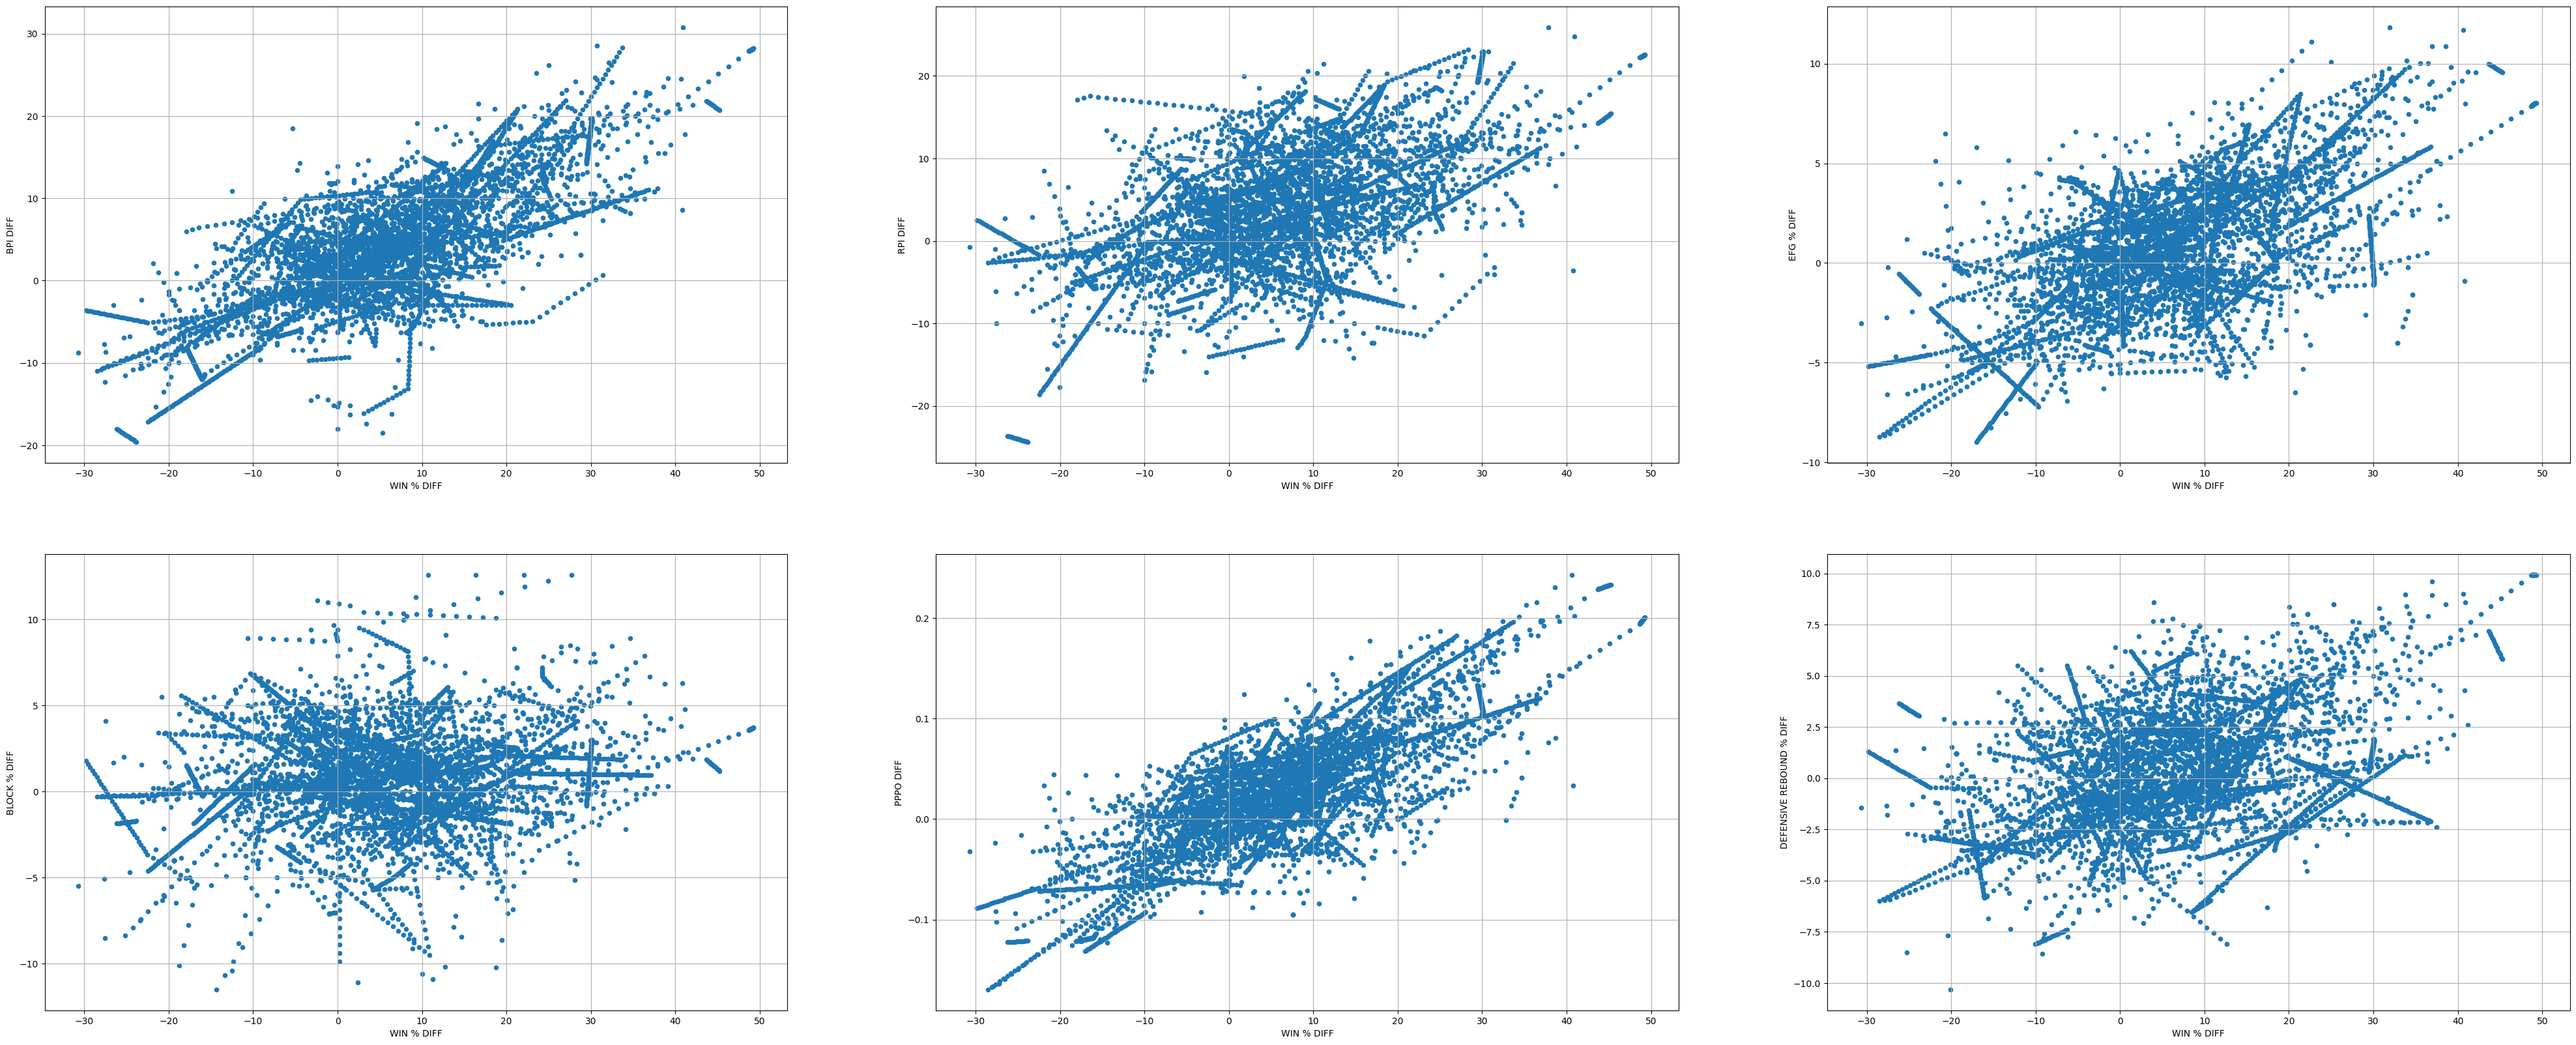

In [31]:
for year in [2008]:
    year_data = merged_data[merged_data['YEAR'] == year]
    fig, axs = plt.subplots(2, 3, figsize=(50, 20))
    year_data.plot(kind='scatter', x='WIN % DIFF', y='BPI DIFF', ax=axs[0, 0], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='RPI DIFF', ax=axs[0, 1], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='EFG % DIFF', ax=axs[0, 2], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='BLOCK % DIFF', ax=axs[1, 0], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='PPPO DIFF', ax=axs[1, 1], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='DEFENSIVE REBOUND % DIFF', ax=axs[1, 2], grid=True)

Sada kada imamo sve podatke, možemo ih prikazati u obliku grafa kako bismo vidjeli njihovu korelaciju s postotkom pobjede.